# Data Story Telling, Exploratory Data Analysis & Inferential Statistics
# _Factors affecting vessel delays at US Army Corps of Engineers-managed locks on US waterways._

## Springboard Data Science Career Track, Capstone 2
***
* Author: Heather A. Passmore
* Data: United States Army Corps of Engineers, Lock Performance Management System
* Capstone Description: Project Proposal (add link)
* Initial Data Approach: Data Wrangling (create, add link)
***
## Table of Contents
1. Import Merged Dataframes & Check Descriptive Statistics
2. Define Delay & Explore Patterns 
3. Heading

## 1. Import Merged Dataframes & Check Descriptive Statistics

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import pickle
import scipy.stats
from scipy.stats import norm
import scipy as sp

# Figures inline, visualization style
%matplotlib inline

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

In [2]:
# Bring traf_sample dataframe into workspace: random sample ~ 2000 rows per lock over 5 years
# load the pickled traffic_2013_2017 DataFrame from hard drive in 'rb' mode
with open('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/traffic_5yr_sample.pickle','rb') as f:
    traf_sample = pickle.load(f)

In [3]:
# Bring barge_flot_vessel dataframe into workspace
# load the pickled traffic_2013_2017 DataFrame from hard drive in 'rb' mode
with open('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/barge_flot_vessel.pickle','rb') as f:
    barge_flot_vessel = pickle.load(f)

In [4]:
# Bring stall_stop_2013_2017_descriptors dataframe into workspace
# load the pickled traffic_2013_2017 DataFrame from hard drive in 'rb' mode
with open('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/stall_stop_2013_2017_descriptors.pickle','rb') as f:
    stoppage_descriptors = pickle.load(f)

In [5]:
# Read rivermstr csv for river_names
rivermstr = pd.read_csv('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/RIVERMSTR.csv', 
                    index_col=None, header = 0)

In [6]:
# check the summary statistics of numerical fields in subsampled traffic table
traf_sample.describe()

,LOCK_NO,CHMBR_NO,VESSEL_NO,NUM_CMRCL_PASSGRS,LINE_SEQ_NO,entry_time,exit_time,delay_time
count,392000.000000,392000.000000,3.920000e+05,54260.000000,392000.000000,281459.000000,281561.000000,392000.000000
mean,20.397120,1.292842,1.783938e+09,19.514965,499870.883867,8.858892,11.049684,108.612217
std,22.160452,0.801119,1.356117e+09,78.109511,287824.347127,8.172415,22.143275,657.296516
min,1.000000,1.000000,4.300830e+05,0.000000,3.000000,1.000000,1.000000,0.000000
25%,4.000000,1.000000,4.358892e+08,0.000000,250233.750000,3.000000,4.000000,0.000000
50%,12.000000,1.000000,1.649363e+09,2.000000,501994.500000,7.000000,8.000000,5.000000
75%,26.000000,1.000000,2.996234e+09,9.000000,745255.250000,12.000000,15.000000,64.000000
max,99.000000,5.000000,4.293307e+09,5140.000000,999995.000000,1090.000000,4325.000000,87870.000000


In [6]:
# Remove all 'delay_time' = 0 rows: no_zero_delay
no_zero_delay = traf_sample.query('delay_time != 0')

,EROC,RIVER_CODE,LOCK_NO,CHMBR_NO,OPS_ID,LOCKAGE_TYPE,VESSEL_NO,VESSEL_FUNCTION_TYPE,FLOTILLA_NO,ARRIVAL_DATE,...,START_OF_EXIT,END_OF_LOCKAGE,NUM_CMRCL_PASSGRS,ASST_CODE,SIGNAL_DATE,DEPARTURE_DATE,LINE_SEQ_NO,entry_time,exit_time,delay_time
2093451,H2,OH,75,2,L5608584,S,2246973225,T,L3435504,2014-05-07 05:37:00,...,2014-05-07 06:30:00,2014-05-07 06:44:00,NaN,NaN,NaT,NaT,821558,10.0,14.0,10.0
1234536,M3,GI,14,1,L6150873,O,3171419219,T,L3767838,2015-02-10 20:00:00,...,NaT,2015-02-10 21:07:00,NaN,NaN,NaT,NaT,838438,NaN,NaN,66.0
1391794,H4,MN,25,1,L6581479,S,2064406338,T,L4017674,2015-09-20 02:20:00,...,2015-09-20 03:10:00,2015-09-20 03:15:00,NaN,NaN,NaT,NaT,362970,10.0,5.0,20.0
638365,M3,GI,13,1,L7255211,O,1088709797,T,L4420842,2016-10-01 01:08:00,...,NaT,2016-10-01 02:16:00,NaN,NaN,NaT,NaT,810510,NaN,NaN,67.0
1362206,H4,OH,71,1,L6225825,S,1078394486,T,L3821128,2015-04-06 19:24:00,...,2015-04-06 20:19:00,2015-04-06 20:29:00,0.0,NaN,NaT,NaT,135181,14.0,10.0,7.0
575819,B2,GI,1,1,L7836405,S,356322780,T,L4779114,2017-09-01 11:20:00,...,2017-09-01 13:24:00,2017-09-01 13:32:00,NaN,NaN,NaT,NaT,981839,5.0,8.0,91.0
2943240,B2,GI,77,1,L5076031,S,2188274291,T,L3092988,2013-07-05 22:45:00,...,2013-07-05 23:34:00,2013-07-05 23:42:00,NaN,NaN,NaT,NaT,814563,4.0,8.0,35.0
581437,B2,FB,41,1,L7970618,S,3276477126,F,NaN,2017-11-14 02:21:00,...,2017-11-14 02:46:00,2017-11-14 02:48:00,NaN,NaN,NaT,NaT,469746,3.0,2.0,8.0
42951,M3,GI,13,1,L7726276,O,2891807192,T,L4722167,2017-07-13 15:06:00,...,NaT,2017-07-13 17:44:00,NaN,NaN,NaT,NaT,605929,NaN,NaN,157.0
1874537,M3,GI,12,1,L5612204,O,1977530173,T,L3437866,2014-05-08 21:15:00,...,NaT,2014-05-08 21:20:00,NaN,NaN,NaT,NaT,835722,NaN,NaN,1.0


In [7]:
no_zero_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252781 entries, 2093451 to 488481
Data columns (total 23 columns):
EROC                    252781 non-null object
RIVER_CODE              252781 non-null object
LOCK_NO                 252781 non-null int64
CHMBR_NO                252781 non-null int64
OPS_ID                  252781 non-null object
LOCKAGE_TYPE            252781 non-null object
VESSEL_NO               252781 non-null int64
VESSEL_FUNCTION_TYPE    252564 non-null object
FLOTILLA_NO             188928 non-null object
ARRIVAL_DATE            252781 non-null datetime64[ns]
SOL_DATE                252781 non-null datetime64[ns]
BOW_OVER_SILL           182840 non-null datetime64[ns]
END_OF_ENTRY            182861 non-null datetime64[ns]
START_OF_EXIT           182865 non-null datetime64[ns]
END_OF_LOCKAGE          252781 non-null datetime64[ns]
NUM_CMRCL_PASSGRS       24206 non-null float64
ASST_CODE               17453 non-null object
SIGNAL_DATE             813 non-null dat

In [30]:
# check the summary statistics of numerical fields in subsampled traffic table
no_zero_delay.describe()

,LOCK_NO,CHMBR_NO,VESSEL_NO,NUM_CMRCL_PASSGRS,LINE_SEQ_NO,entry_time,exit_time,delay_time,log_delay
count,252781.000000,252781.000000,2.527810e+05,24206.000000,252781.000000,182824.000000,182865.000000,252781.000000,252781.000000
mean,18.281390,1.255941,1.950238e+09,32.702884,500462.305632,8.317201,11.510984,168.430337,3.415157
std,21.134229,0.749001,1.303500e+09,96.405534,287793.577511,7.815966,19.916673,812.348147,1.924730
min,1.000000,1.000000,4.300830e+05,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,8.464360e+08,0.000000,250571.000000,3.000000,4.000000,7.000000,1.945910
50%,11.000000,1.000000,1.852857e+09,3.000000,502734.000000,6.000000,8.000000,35.000000,3.555348
75%,23.000000,1.000000,3.105937e+09,40.000000,746070.000000,12.000000,15.000000,109.000000,4.691348
max,99.000000,5.000000,4.293307e+09,5140.000000,999995.000000,1090.000000,4325.000000,87870.000000,11.383614


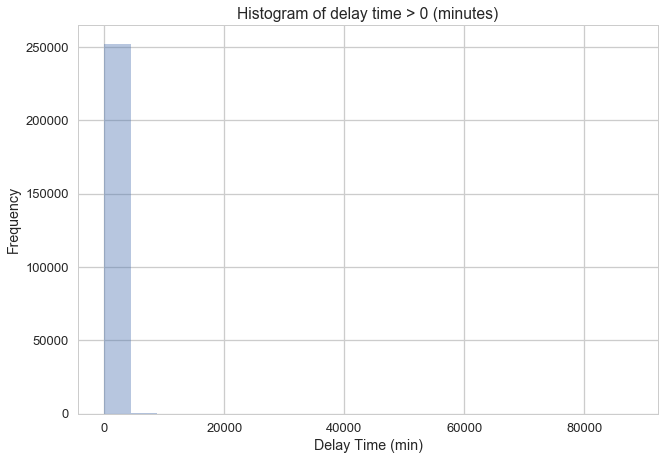

In [9]:
# view a histogram of delay_time with no 'delay_time' = 0
sns.distplot(no_zero_delay.delay_time, bins=20, kde=False, rug=False);
plt.title('Histogram of delay time > 0 (minutes)');
plt.xlabel('Delay Time (min)');
plt.ylabel('Frequency');

In [10]:
# Log transform 'delay_time' to view all data on histogram (raw data too skewed)
no_zero_delay = no_zero_delay.assign(log_delay = lambda x: np.log(x.delay_time))

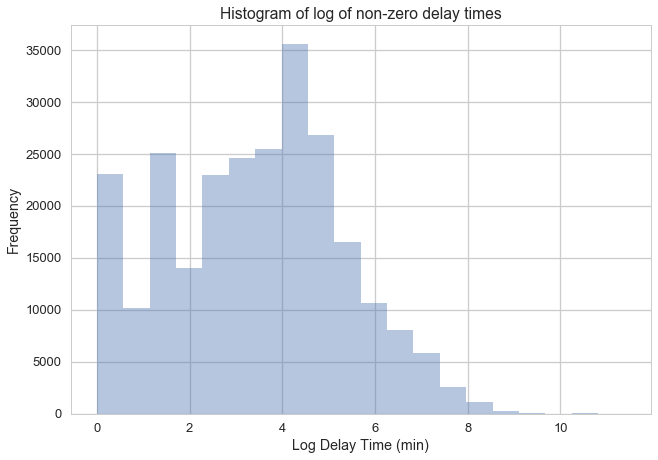

In [12]:
# view a histogram of log of delay_time
sns.distplot(no_zero_delay.log_delay, bins=20, kde=False, rug=False);
plt.title('Histogram of log of non-zero delay times');
plt.xlabel('Log Delay Time (min)');
plt.ylabel('Frequency');

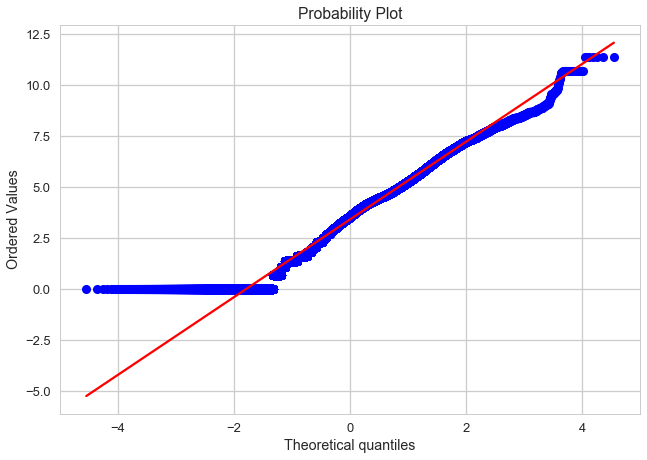

In [13]:
# check normality with Q-Q plot
scipy.stats.probplot(no_zero_delay.log_delay, dist='norm', fit=True, plot=plt);

## 2. Define Delay & Explore Patterns

In [34]:
# Define Delay: Based on the 75th percentile (not including zero delay times) delay > 110 minutes
traf_sample['delay'] = traf_sample['delay_time'].apply(lambda x: x > 110)

In [15]:
# Look at dataframe
traf_sample.head()

,EROC,RIVER_CODE,LOCK_NO,CHMBR_NO,OPS_ID,LOCKAGE_TYPE,VESSEL_NO,VESSEL_FUNCTION_TYPE,FLOTILLA_NO,ARRIVAL_DATE,...,END_OF_LOCKAGE,NUM_CMRCL_PASSGRS,ASST_CODE,SIGNAL_DATE,DEPARTURE_DATE,LINE_SEQ_NO,entry_time,exit_time,delay_time,delay
2093451,H2,OH,75,2,L5608584,S,2246973225,T,L3435504,2014-05-07 05:37:00,...,2014-05-07 06:44:00,NaN,NaN,NaT,NaT,821558,10.0,14.0,10.0,False
5791,M5,MK,22,1,L7532719,C,967995540,T,L4611089,2017-04-06 00:40:00,...,2017-04-06 01:43:00,NaN,NaN,NaT,NaT,912730,30.0,8.0,0.0,False
1234536,M3,GI,14,1,L6150873,O,3171419219,T,L3767838,2015-02-10 20:00:00,...,2015-02-10 21:07:00,NaN,NaN,NaT,NaT,838438,NaN,NaN,66.0,False
1391794,H4,MN,25,1,L6581479,S,2064406338,T,L4017674,2015-09-20 02:20:00,...,2015-09-20 03:15:00,NaN,NaN,NaT,NaT,362970,10.0,5.0,20.0,False
638365,M3,GI,13,1,L7255211,O,1088709797,T,L4420842,2016-10-01 01:08:00,...,2016-10-01 02:16:00,NaN,NaN,NaT,NaT,810510,NaN,NaN,67.0,False


In [35]:
# count number of delays
traf_sample['delay'].value_counts()

False    329597
True      62403
Name: delay, dtype: int64

In [36]:
# calculate percent of lock delays
no_delay = traf_sample['delay'].value_counts()[0] # first value of the result above
delays = traf_sample['delay'].value_counts()[1] # second value of the result above
total_lockage = no_delay + delays # total count of lockage events
print('Overall proportion of vessels delayed', float(delays) / total_lockage) # converting to float to get a float result

Overall proportion of vessels delayed 0.159191326531


In [19]:
# groupby EROC to see counts by Engineer Reporting Office Code (Corps division & district)
group_by_EROC = traf_sample.groupby(['EROC','delay'])

In [20]:
# group categories by size and unstack by EROC
count_delays_by_eroc = group_by_EROC.size().unstack()

In [21]:
# calculate proportion of lockage events that are 'delays' (>110min)
prop_by_EROC = pd.DataFrame(traf_sample.groupby('EROC')['delay'].apply(lambda x: np.sum(x)/len(x)))

In [37]:
# Join count_delays_by_eroc with prop_by_EROC
count_prop_EROC = count_delays_by_eroc.join(prop_by_EROC)
count_prop_EROC

,False,True,delay
EROC,,,
B2,48636,17342,0.262845
B3,9235,5470,0.371982
B4,4715,46,0.009662
B5,34474,13113,0.275558
B6,22069,1515,0.064238
E3,1532,8,0.005195
E4,3427,10,0.002910
G2,3660,82,0.021913
G3,9215,37,0.003999


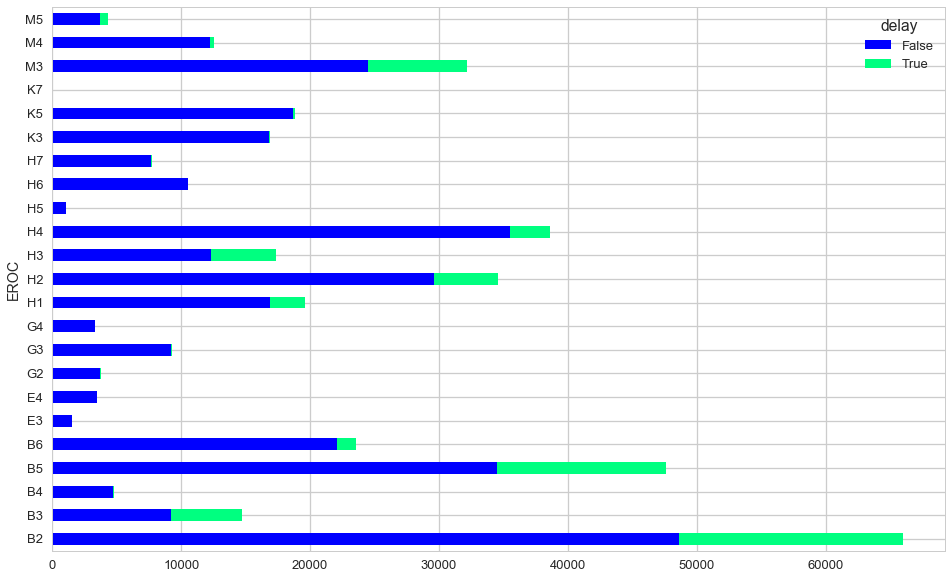

In [65]:
# Plot delay/no delay by EROC
count_delays_by_eroc.plot(kind='barh', stacked=True, figsize=[16,10], colormap='winter')

In [22]:
# groupby River_Code to get counts by River
group_by_river = traf_sample.groupby(['RIVER_CODE','delay'])

In [23]:
# view categories by size and unstack by RIVER_CODE
count_delays_by_river = group_by_river.size().unstack()

In [24]:
# calculate proportion of lockage events by river that are 'delays' (>110min)
prop_by_river = pd.DataFrame(traf_sample.groupby('RIVER_CODE')['delay'].apply(lambda x: np.sum(x)/len(x)))

In [81]:
# set index of rivermstr to river_code
rivers = rivermstr.set_index('RIVER_CODE')

# Join rivers with count_delays_by_river to provide river names
delays_rivername = rivers.join(count_delays_by_river)

# Join delays_rivername with prop_by_river, view highest proportion of delays first
count_prop_river = delays_rivername.join(prop_by_river)
count_prop_river.sort_values(by=['delay'], ascending=False, inplace=True, )
count_prop_river

,RIVER_NAME,False,True,delay
RIVER_CODE,,,,
TN,TENNESSEE RIVER,9002.0,4523.0,0.334418
GI,GULF INTRACOASTAL WATERWAY,58551.0,24942.0,0.298732
IL,ILLINOIS WATERWAY,14748.0,4724.0,0.242605
MI,MISSISSIPPI RIVER,50277.0,15374.0,0.234178
OH,OHIO RIVER,56797.0,9872.0,0.148075
CU,CUMBERLAND RIVER,3290.0,538.0,0.140543
KA,KANAWHA RIVER,3078.0,471.0,0.132713
FR,CAPE FEAR RIVER,11.0,1.0,0.083333
MK,MC-KERR ARKANSAS RIV NAV SYS,15918.0,954.0,0.056543


In [27]:
# groupby LOCKAGE_TYPE to see counts by LOCKAGE_TYPE
group_by_LOCKAGE = traf_sample.groupby(['LOCKAGE_TYPE','delay'])

In [28]:
# view categories by size and unstack by LOCKAGE_TYPE
# A = Barges After Tow, B = Barges Before Tow, C = Consecutive, F = Fast Double
# J = Jacknife, K = Knockout, N = Navigable Pass, O = Open Pass, S = Straight
# T = Barge Transfer, V = Setover, Z = other
count_delays_by_lockage = group_by_LOCKAGE.size().unstack()

In [29]:
# calculate percent of lockage events that are 'delays' (>110min)
prop_by_lockage = pd.DataFrame(traf_sample.groupby('LOCKAGE_TYPE')['delay'].apply(lambda x: np.sum(x)/len(x)))

# Join count_delays_by_eroc with pct_by_EROC
count_prop_lockage = count_delays_by_lockage.join(prop_by_lockage)
count_prop_lockage

,False,True,delay
LOCKAGE_TYPE,,,
A,10,2,0.166667
B,7292,3100,0.298306
C,33561,19506,0.367573
F,555,68,0.109149
J,11,8,0.421053
K,10044,1720,0.146209
N,9895,814,0.076011
O,40058,9072,0.184653
S,227254,27736,0.108773


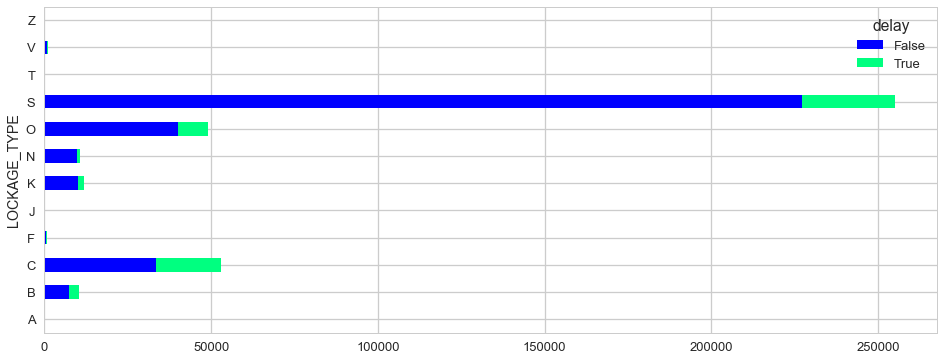

In [58]:
# Plot delay/no delay by Lockage Type
count_delays_by_lockage.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

## Explore patterns in delay count by year, month, day

In [55]:
# Remove all 'delay' = False rows: only_delay
only_delay = traf_sample.query('delay != False')
only_delay.head()

,EROC,RIVER_CODE,LOCK_NO,CHMBR_NO,OPS_ID,LOCKAGE_TYPE,VESSEL_NO,VESSEL_FUNCTION_TYPE,FLOTILLA_NO,ARRIVAL_DATE,...,END_OF_LOCKAGE,NUM_CMRCL_PASSGRS,ASST_CODE,SIGNAL_DATE,DEPARTURE_DATE,LINE_SEQ_NO,entry_time,exit_time,delay_time,delay
42951,M3,GI,13,1,L7726276,O,2891807192,T,L4722167,2017-07-13 15:06:00,...,2017-07-13 17:44:00,NaN,NaN,NaT,NaT,605929,NaN,NaN,157.0,True
1763583,B2,GI,4,1,L6449717,S,1738273732,T,L3950462,2015-07-24 03:41:00,...,2015-07-24 11:52:00,NaN,NaN,NaT,NaT,927674,5.0,4.0,437.0,True
1763314,B2,GI,4,1,L6475971,S,3020701214,T,L3963416,2015-08-03 09:33:00,...,2015-08-03 21:03:00,NaN,NaN,NaT,NaT,12767,10.0,10.0,649.0,True
527413,B2,GI,8,1,L7514042,S,1815299047,T,L4598081,2017-03-25 14:08:00,...,2017-03-25 19:23:00,NaN,NaN,NaT,NaT,836439,2.0,4.0,263.0,True
30278,M3,GI,14,1,L7904556,O,853921802,T,L4814978,2017-10-08 04:18:00,...,2017-10-08 07:30:00,NaN,NaN,NaT,NaT,216755,NaN,NaN,191.0,True


In [72]:
# Explore delays per year
group_year = only_delay.groupby(pd.Grouper(key='ARRIVAL_DATE', freq="Y")) 
count_delays_by_year = group_year.size()
count_delays_by_year

ARRIVAL_DATE
2013-12-31     9066
2014-12-31    12241
2015-12-31    13078
2016-12-31    13802
2017-12-31    14216
Freq: A-DEC, dtype: int64

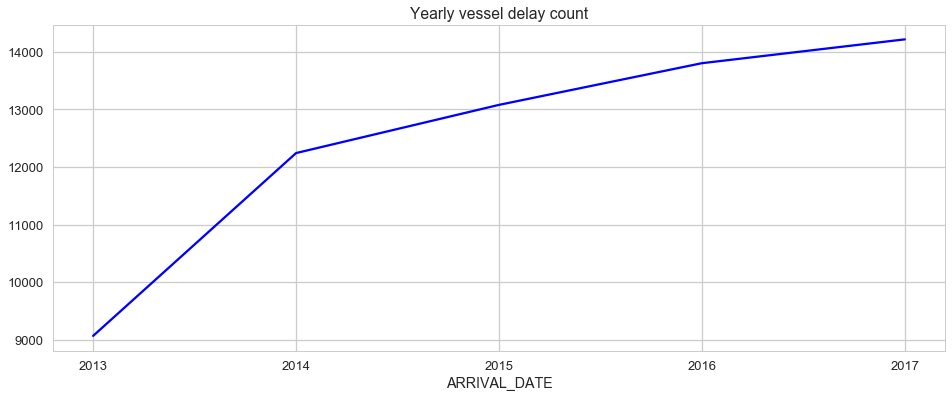

In [78]:
# Plot count of delayed vessels by year
count_delays_by_year.plot(kind='line', figsize=[16,6], colormap='winter',
                         title='Yearly vessel delay count')

In [73]:
# Explore delays per month
group_month = only_delay.groupby(pd.Grouper(key='ARRIVAL_DATE', freq="M")) 
count_delays_by_month = group_month.size()

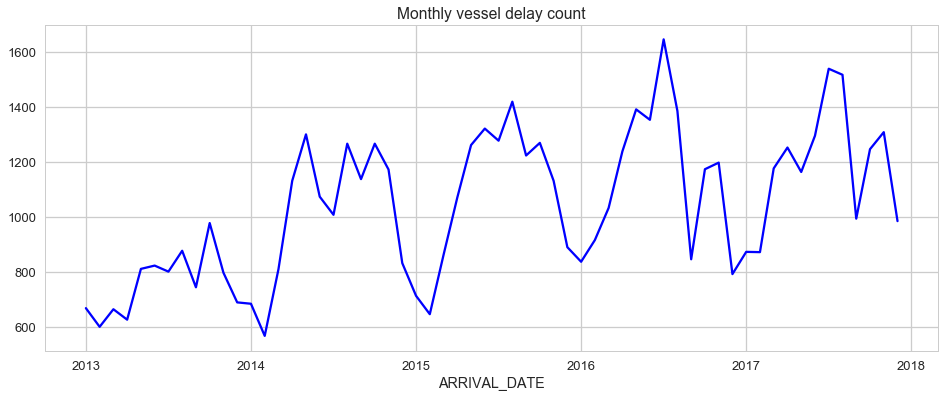

In [74]:
# Plot count of delayed vessels by month
count_delays_by_month.plot(kind='line', figsize=[16,6], colormap='winter',
                         title='Monthly vessel delay count')

In [76]:
# Explore delays per day
group_day = only_delay.groupby(pd.Grouper(key='ARRIVAL_DATE', freq="D")) 
count_delays_by_day = group_day.size()

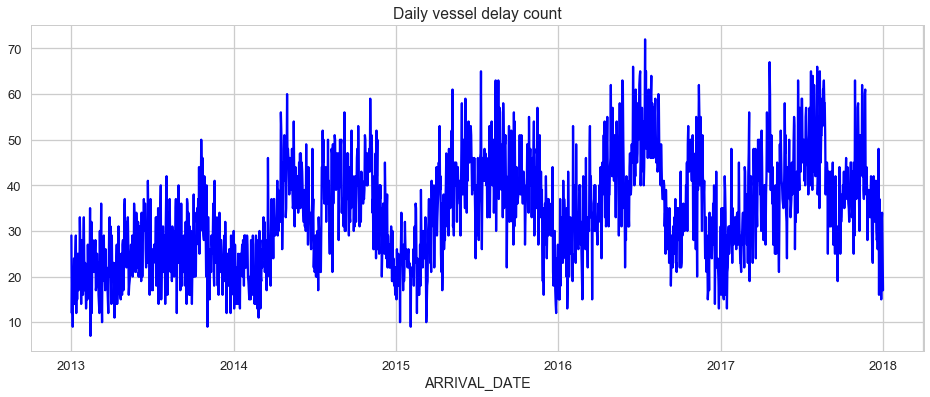

In [77]:
# Plot count of delayed vessels by day
count_delays_by_day.plot(kind='line', figsize=[16,6], colormap='winter',
                         title='Daily vessel delay count')

## Now explore per lock and per day

In [100]:
# Split 'ARRIVAL_DATE' into date and time columns
traf_sample['YYYMMDD'] = traf_sample['ARRIVAL_DATE'].dt.date
traf_sample['hhmmss'] = traf_sample['ARRIVAL_DATE'].dt.time

In [101]:
traf_sample.head()

,EROC,RIVER_CODE,LOCK_NO,CHMBR_NO,OPS_ID,LOCKAGE_TYPE,VESSEL_NO,VESSEL_FUNCTION_TYPE,FLOTILLA_NO,ARRIVAL_DATE,...,ASST_CODE,SIGNAL_DATE,DEPARTURE_DATE,LINE_SEQ_NO,entry_time,exit_time,delay_time,delay,YYYMMDD,hhmmss
2093451,H2,OH,75,2,L5608584,S,2246973225,T,L3435504,2014-05-07 05:37:00,...,NaN,NaT,NaT,821558,10.0,14.0,10.0,False,2014-05-07,05:37:00
5791,M5,MK,22,1,L7532719,C,967995540,T,L4611089,2017-04-06 00:40:00,...,NaN,NaT,NaT,912730,30.0,8.0,0.0,False,2017-04-06,00:40:00
1234536,M3,GI,14,1,L6150873,O,3171419219,T,L3767838,2015-02-10 20:00:00,...,NaN,NaT,NaT,838438,NaN,NaN,66.0,False,2015-02-10,20:00:00
1391794,H4,MN,25,1,L6581479,S,2064406338,T,L4017674,2015-09-20 02:20:00,...,NaN,NaT,NaT,362970,10.0,5.0,20.0,False,2015-09-20,02:20:00
638365,M3,GI,13,1,L7255211,O,1088709797,T,L4420842,2016-10-01 01:08:00,...,NaN,NaT,NaT,810510,NaN,NaN,67.0,False,2016-10-01,01:08:00


In [131]:
# Group by lock and day with count of delay (true/false)
lock_year = pd.DataFrame(traf_sample.groupby(['EROC', 'RIVER_CODE','LOCK_NO','YYYMMDD', 'delay'])['delay'].count())

In [132]:
# turn 'delay' index into a column
lock_year.rename(columns={'delay':'count'}, inplace=True)
lock_year.reset_index(level='delay',inplace=True) 
lock_year.head()

delay  count
EROC RIVER_CODE LOCK_NO YYYMMDD                 
B2   AT         11      2013-01-01  False      2
                        2013-01-04  False      2
                        2013-01-06  False      1
                        2013-01-07  False      1
                        2013-01-08  False      1

In [133]:
# pivot so that delay is two columns and count is the value
#lock_year.unstack()
#lock_year.pivot(index=['EROC', 'RIVER_CODE','LOCK_NO','YYYMMDD'], columns='delay', values='count')
#lock_year.head()

In [ ]:
# Let's plot delay and no-delay cumulative counts
plot_cols = ['False', 'True']

In [ ]:
# draft code for subplots of datetime intervals per lock
fig, axes = plt.subplots(10,1, figsize=(12,9), sharex=True)
data[plot_cols].plot(subplots=True, ax=axes)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, plot_cols):
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    # lets add horizontal zero lines
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    
    # add titles
    ax.set_title('Monthly ' + col + ' \nRecessions Shaded Gray')
    
    # add axis labels
    ax.set_ylabel('Returns')
    ax.set_xlabel('Date')
    
    # upgrade axis tick labels
    yticks = ax.get_yticks()
    ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in yticks]);

    dates_rng = pd.date_range(data.index[0], data.index[-1], freq='6M')
    plt.xticks(dates_rng, [dtz.strftime('%Y-%m') for dtz in dates_rng], rotation=45)
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  

# now to use tight layout
plt.tight_layout()